In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

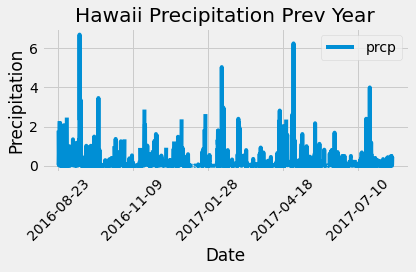

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
previous_yr=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_one_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=previous_yr).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data=pd.DataFrame(date_one_year, columns=['date','prcp'])

# Sort the dataframe by date
precip_data=precip_data.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data


precip_data.plot('date','prcp')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Hawaii Precipitation Prev Year')
plt.tight_layout()
plt.show()





In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#filter for Most active station was 'USC00519281'
session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

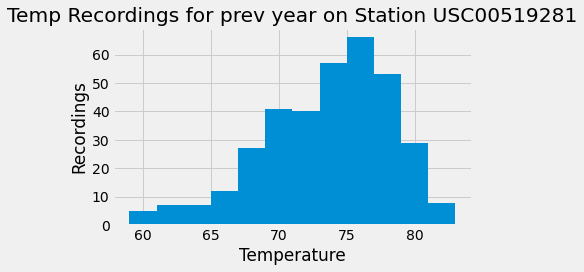

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_one_year = session.query(Measurement.station,Measurement.tobs).filter(Measurement.date>=previous_yr, Measurement.station=='USC00519281').all()

#make a dataframe for station and temps from last year
tobs_df=pd.DataFrame(most_active_one_year, columns=['station','tobs'])


#plot histogram
plt.hist(tobs_df['tobs'],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Recordings')
plt.title('Temp Recordings for prev year on Station USC00519281')
plt.tight_layout()
plt.show()


# Close session

In [17]:
# Close Session
session.close()